# Import librairies & configuration

In [0]:
# import des libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pandas as pd
import scipy as sp
import scipy.stats as st

# Importation et préparation des données

In [0]:
# importation données
url_data = "https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_6/data/notes.csv"

data = pd.read_csv(url_data)

data.head(5)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [0]:
# format du data frame
data.shape

(170, 7)

In [0]:
# recherche valeur nulles
print(pd.isnull(data).sum())

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [0]:
# conservation données initiales
data_full = data.copy()

## Analyse descriptive

In [0]:
# description des données
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [0]:
# réparatition billets vraix/faux
data["is_genuine"].value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

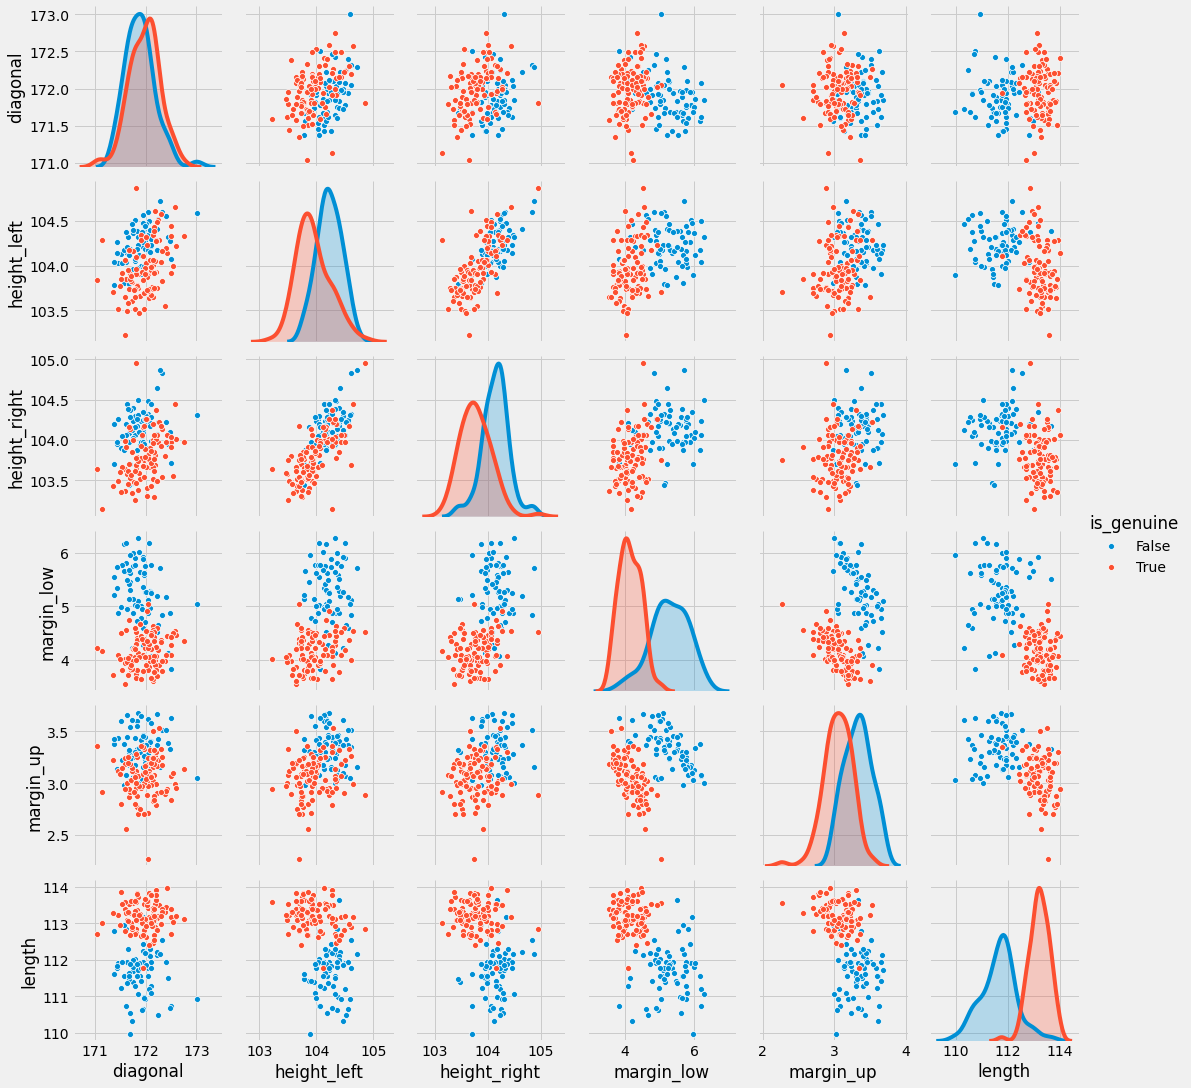

In [0]:
# matrice par paires
sns.pairplot(data,hue = "is_genuine")

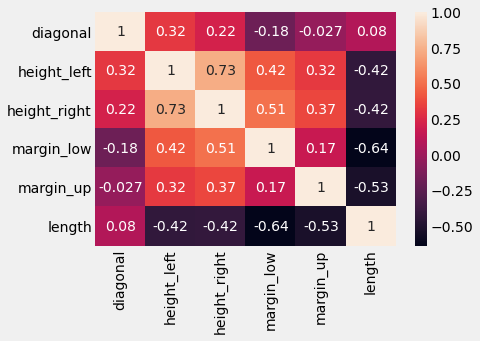

In [0]:
# Matrice corrélations
cols = ["diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"	]
corr_matrix=data[cols].corr()

sns.heatmap(corr_matrix,annot=True)

## ACP

In [0]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram

In [0]:
# fonction ACP
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


## Eboulis des valeurs propres

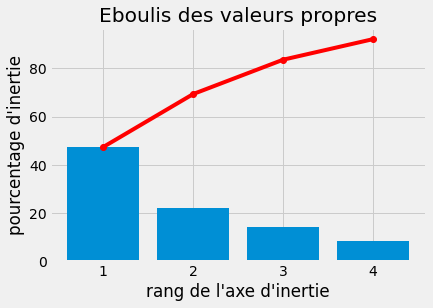

In [0]:
# choix du nombre de composantes à calculer
n_comp = 4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"	]]

# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.index # ou data.index pour avoir les intitulés
features = data.columns[1:]

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

## Cercle des corrélations 1er plan

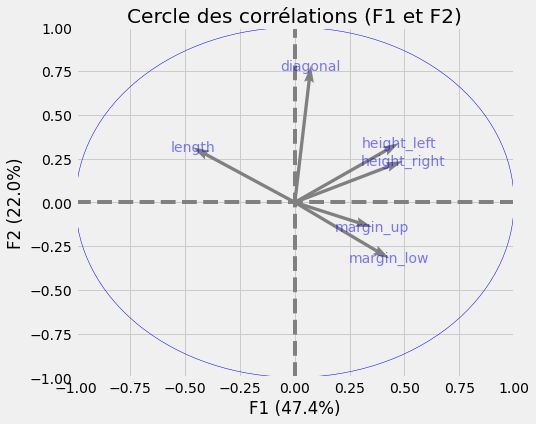

In [0]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

In [0]:
# composantes F1
# "diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"
f1 = pca.components_[0]
print(f1)

[ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]


In [0]:
# composantes F2
# "diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"
f2 = pca.components_[1]
print(f2)

[ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]


In [0]:
# Centrage et Réduction

Z = data.values
std_scale = preprocessing.StandardScaler().fit(Z)
Z_scaled = std_scale.transform(Z)
ind = data.index
variables = data.columns

temp = pd.DataFrame(data=Z_scaled, index=ind, columns=variables)

temp["is_genuine"] = data["is_genuine"]

# conservation données centrées et réduites
data = temp

In [0]:
#contribution des individus dans l'inertie totale
di = np.sum(Z_scaled**2,axis=1)
contrib_id=pd.DataFrame({'ID':data.index,'d_i':di})
contrib_id.head(10)

,ID,d_i
0,0,19.110598
1,1,6.144799
2,2,5.660527
3,3,5.505719
4,4,18.739567
5,5,12.227985
6,6,8.729025
7,7,10.044338
8,8,6.661640
9,9,3.073650


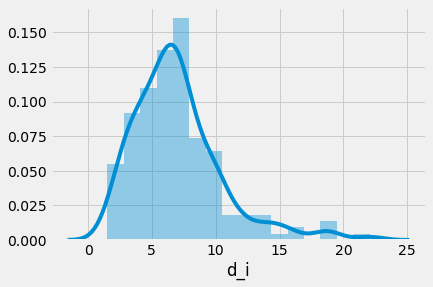

In [0]:
sns.distplot( contrib_id["d_i"] )

In [0]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#nombre de variables
p = X[1:].shape[1]

#instanciation
acp = PCA(svd_solver='full')
#calculs
coord = acp.fit_transform(X_scaled)

#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
rep_ind = pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
rep_ind.head(10)

,id,COS2_1,COS2_2
0,0,0.242701,0.133908
1,1,0.724817,0.045033
2,2,0.687803,0.000409
3,3,0.770609,0.001442
4,4,0.308186,0.009066
5,5,0.124865,0.727792
6,6,0.495354,0.150974
7,7,0.685464,0.107710
8,8,0.452557,0.007778
9,9,0.172187,0.368241


Text(0.5, 1.0, 'Qualité de représentation des individus sur 1er plan')

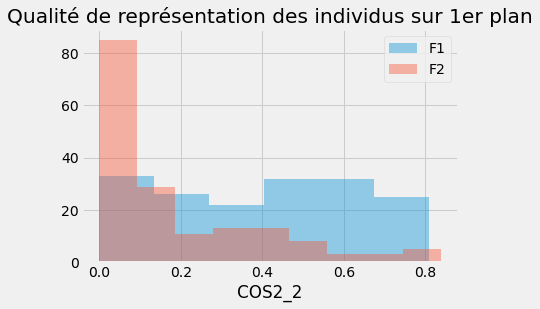

In [0]:
sns.distplot( a=rep_ind["COS2_1"] , hist=True, kde=False, rug=False )

sns.distplot( a=rep_ind["COS2_2"], hist=True, kde=False, rug=False )

plt.legend(["F1", "F2"])
plt.title('Qualité de représentation des individus sur 1er plan')

In [0]:
# Projection des individus
X_projected = pca.transform(X_scaled)

# Obtention F1 & F2
data_fn = pd.DataFrame(X_projected, index=data.index,columns=["F"+str(i+1) for i in range(4)])
data_fn = data_fn.reset_index()

# merge data & data_fn
temp = pd.concat([data, data_fn], axis=1)
del temp["index"]
temp.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,F1,F2,F3,F4
0,True,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,2.153639,1.599709,1.787451,2.433465
1,True,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,-2.110416,-0.526039,0.542563,0.344550
2,True,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,-1.973152,-0.048102,0.858716,0.374812
3,True,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,-2.059795,-0.089105,-0.531529,0.519548
4,True,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,-2.403180,0.412170,3.319507,-0.837043


### Projection individus sur 1er plan

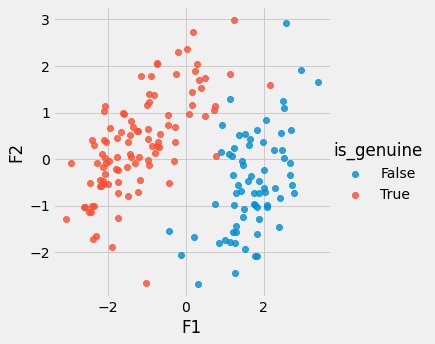

In [0]:
# graphique projection individus sur 1er plan
sns.lmplot(x="F1", y = "F2", hue="is_genuine", data=temp, fit_reg=False);

### Projection centroides 1er plan

In [0]:
# récupération centroides 1er plan selon is_genuine
cent_acp = temp.groupby(["is_genuine" ]).mean()
cent_acp = cent_acp.reset_index()
cent_acp.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,F1,F2,F3,F4
0,False,-0.166404,0.551873,0.658940,0.956315,0.696580,-0.986951,1.691374,-0.502571,-0.022942,-0.139574
1,True,0.116483,-0.386311,-0.461258,-0.669421,-0.487606,0.690866,-1.183962,0.351800,0.016060,0.097702


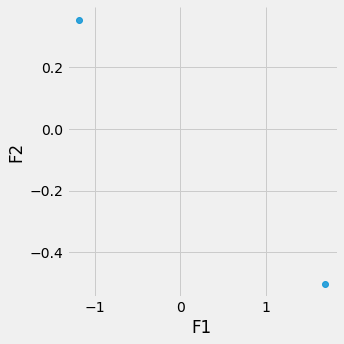

In [0]:
# graphique de projection centroides 1er plan
sns.lmplot(x="F1", y = "F2",  data=cent_acp, fit_reg=False)

1 plan factoriel permet
* bonne séparation individus selon variable à prédire
* bonne séparation centroide selon variable à prédire 

## Cercle des corrélation 2eme plan

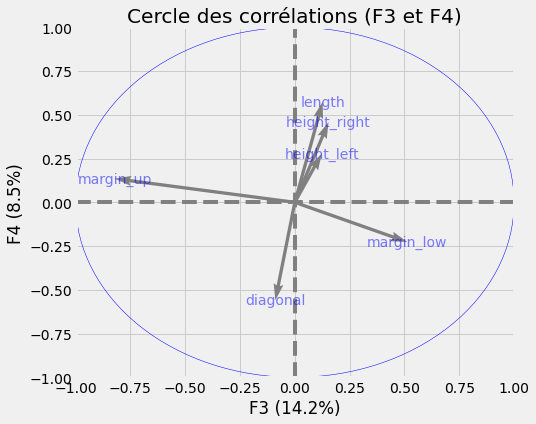

In [0]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

### Projection individus 2eme plan

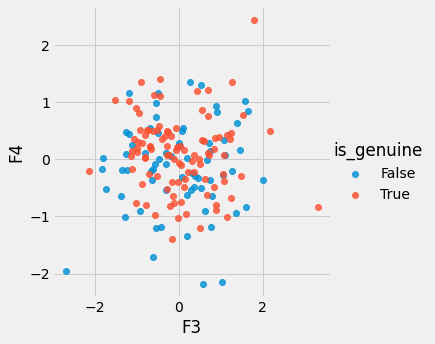

In [0]:
# graphique projection individus 2eme plan
sns.lmplot(x="F3", y = "F4", hue="is_genuine", data=temp, fit_reg=False);

Le 2 eme plan factoriel ne permet pas de séparer les individus selon la variable à prédire

# Classification

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

## Kmeans

In [0]:
# Nombre de clusters souhaités
n_clust = 2

# selection des colonnes à prendre en compte dans l'ACP
data_km = data[["diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"	]]

# préparation des données pour l'ACP
X = data_km.values

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [0]:
# conversion en data frame
clusters = pd.DataFrame(clusters)
clusters.columns=["cluster"]
clusters.cluster=clusters.cluster+1 # cluster commencent à 1

In [0]:
# merge cluster & data_1
temp_cluster = pd.concat([clusters, data_fn], axis=1)
del temp_cluster["index"]

### Projection des individus sur 1er plan selon clusters Kmeans

Text(0.5, 1.0, 'Projection individus selon cluster sur 1er plan')

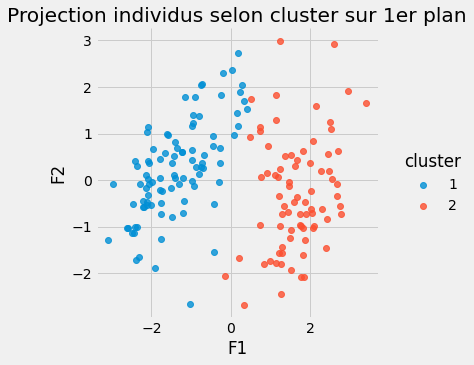

In [0]:
sns.lmplot(x="F1", y = "F2", hue="cluster", data=temp_cluster, fit_reg=False)
plt.title('Projection individus selon cluster sur 1er plan')

### Projection centroides clusters kmeans sur 1er plan factoriel

In [0]:
# récupération des centroides
cent_km = temp_cluster.groupby(["cluster" ]).mean()
cent_km = cent_km.reset_index()

In [0]:
cent_km

,cluster,F1,F2,F3,F4
0,1,-1.361065,0.239422,0.020404,0.045562
1,2,1.643883,-0.289171,-0.024644,-0.055030


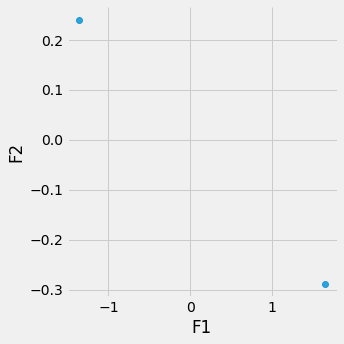

In [0]:
# graphique centroides Kmeans
sns.lmplot(x="F1", y = "F2",  data=cent_km, fit_reg=False)

## Projections centroides ACP et Kmeans

In [0]:
temp_cent = pd.concat([cent_acp[["is_genuine","F1","F2"]], cent_km[["cluster","F1","F2"]]], axis=1)
temp_cent.columns = ["is_genuine","F1_acp","F2_acp","cluster","F1_km","F2_km"]

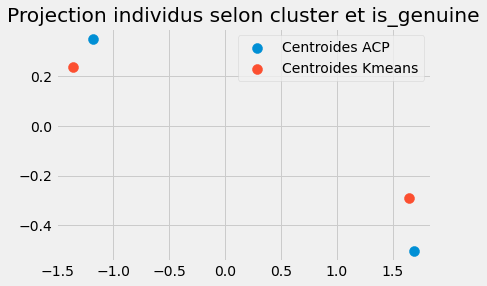

In [0]:
# Graphique projection centroides 
plt.scatter(x="F1_acp", y = "F2_acp",  data=temp_cent, s = 100)
plt.scatter(x="F1_km", y = "F2_km",  data=temp_cent, s = 100)
plt.legend(["Centroides ACP", "Centroides Kmeans"])
plt.title('Projection individus selon cluster et is_genuine')
plt.show()

# Modelisation logistique

In [0]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import Logit


In [0]:
# récupération données complètes
data = temp
data.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,F1,F2,F3,F4
0,True,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,2.153639,1.599709,1.787451,2.433465
1,True,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,-2.110416,-0.526039,0.542563,0.344550
2,True,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,-1.973152,-0.048102,0.858716,0.374812
3,True,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,-2.059795,-0.089105,-0.531529,0.519548
4,True,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,-2.403180,0.412170,3.319507,-0.837043


## Model 1  (complet)


In [0]:
# définition des cibles 
cols=["diagonal",	"height_left",	"height_right","margin_low","margin_up","length"] 

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log1 = sm.Logit(y, X)
result1 = reg_log1.fit(method='lbfgs')

print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.9999
Time:                        10:27:47   Log-Likelihood:             -0.0086318
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 9.084e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -1.5840     46.270     -0.034      0.973     -92.271      89.103
height_left      0.1350     51.880      0.003      0.998    -101.547     101.817
height_right     4.2889     69.600      0.06

* Pas de variables significatives

In [0]:
# récupération beta pour graphique
beta1 = np.exp(result1.params)[0]
beta2 = np.exp(result1.params)[1]

In [0]:
# récupération min et max pour graphique
max = (data.max(axis = 0)).max()
min = (data.min(axis = 0)).min()

In [0]:
# préparation données graphique
x = np.linspace(start=min, stop=max, num=500)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'X': x, 'is genuine': y})

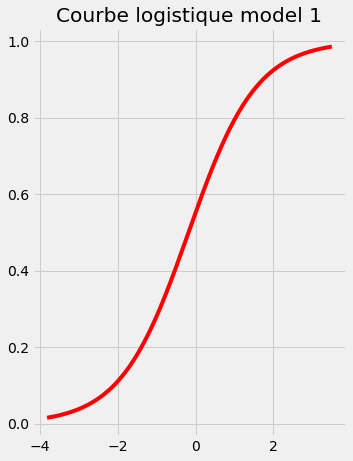

In [0]:
# courbe logistique model 1
plt.figure(figsize=(5,7))
plt.plot(reg_log['X'], reg_log['is genuine'], color='red', label='Courbe logistique')
plt.title('Courbe logistique model 1')
plt.show()

## Model 2 (margin up + margin low + length)


In [0]:
# définition des cibles 
cols=["diagonal",	"height_right","margin_low","margin_up","length"] 

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log2 = sm.Logit(y, X)

# fit the model
result2 = reg_log2.fit(method='lbfgs')

print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                   1.000
Time:                        10:27:47   Log-Likelihood:             -0.0049526
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.116e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -2.0869     42.401     -0.049      0.961     -85.191      81.017
height_right     3.7311     88.446      0.042      0.966    -169.620     177.082
margin_low     -42.3666    134.392     -0.31

In [0]:
# définition des cibles 
cols=["diagonal","margin_low","margin_up","length"] 

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log2 = sm.Logit(y, X)

# fit the model
result2 = reg_log2.fit(method='lbfgs')

print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                   1.000
Time:                        10:27:47   Log-Likelihood:             -0.0034550
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.167e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
diagonal      -1.3567     24.966     -0.054      0.957     -50.290      47.577
margin_low   -50.2192    124.972     -0.402      0.688    -295.161     194.722
margin_up    -20.5963     81.510     -0.253      0.8

In [0]:
# définition des cibles 
cols=["margin_low","margin_up","length"]  

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log2 = sm.Logit(y, X)

# fit the model
result2 = reg_log2.fit(method='lbfgs')

print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.9999
Time:                        10:27:47   Log-Likelihood:             -0.0068771
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 9.628e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
margin_low   -47.5281     92.385     -0.514      0.607    -228.599     133.543
margin_up    -19.2774     71.118     -0.271      0.786    -158.667     120.112
length        17.9005     61.578      0.291      0.7

In [0]:
# définition des cibles 
cols=["margin_low","length"]  

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log2 = sm.Logit(y, X)

# fit the model
result2 = reg_log2.fit(method='lbfgs')

print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.9613
Time:                        10:27:47   Log-Likelihood:                -4.4520
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 4.379e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
margin_low    -9.5509      3.700     -2.582      0.010     -16.802      -2.300
length         8.1480      3.041      2.680      0.007       2.189      14.107

Possibly complete quasi-separation: A fraction 0.75

In [0]:
# récupération min et max pour graphique
max = (data[cols].max(axis = 0)).max()
min = (data[cols].min(axis = 0)).min()

In [0]:
# récupération beta pour graphique
beta1 = np.exp(result2.params)[0]
beta2 = np.exp(result2.params)[1]

In [0]:
# préparation données graphique
x = np.linspace(start=min, stop=max, num=500)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'X': x, 'is genuine': y})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


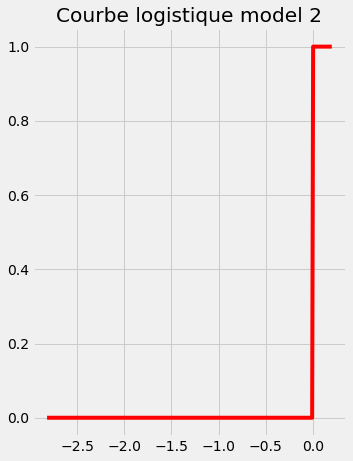

In [0]:
# courbe logistique model 2
plt.figure(figsize=(5,7))
plt.plot(reg_log['X'], reg_log['is genuine'], color='red', label='Courbe logistique')
plt.title('Courbe logistique model 2')
plt.show()

## Model 3 (ACP complet)


In [0]:
# définition des cibles 
cols=["F1","F2"] 

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log3 = sm.Logit(y, X)

# fit the model
result3 = reg_log3.fit(method='lbfgs')

print(result3.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.8703
Time:                        10:27:47   Log-Likelihood:                -14.943
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.656e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F1            -3.3735      0.685     -4.922      0.000      -4.717      -2.030
F2             2.4916      0.613      4.063      0.000       1.290       3.694

Possibly complete quasi-separation: A fraction 0.11

In [0]:
# récupération min et max pour graphique
max = (data[cols].max(axis = 0)).max()
min = (data[cols].min(axis = 0)).min()

In [0]:
# récupération beta pour graphique
beta1 = np.exp(result3.params)[0]
beta2 = np.exp(result3.params)[1]

In [0]:
# préparation données graphique
x = np.linspace(start=min, stop=max, num=500)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'X': x, 'is genuine': y})

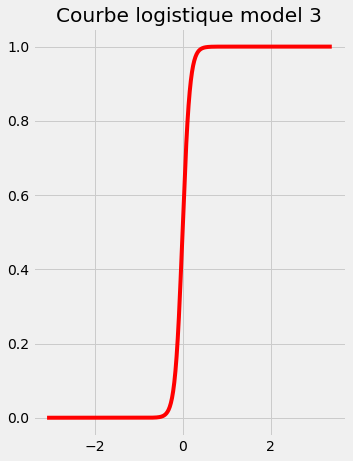

In [0]:
# courbe logistique model 3
plt.figure(figsize=(5,7))
plt.plot(reg_log['X'], reg_log['is genuine'], color='red', label='Courbe logistique')
plt.title('Courbe logistique model 3')
plt.show()

## Model 4 (ACP F1)


In [0]:
# définition des cibles 
cols=["F1"] 

X = data[cols]
y = data["is_genuine"]

In [0]:
# contruction du modele
reg_log4 = sm.Logit(y, X)

# fit the model
result4 = reg_log4.fit(method='lbfgs')

print(result4.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                            0
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.6585
Time:                        10:27:47   Log-Likelihood:                -39.335
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F1            -2.1334      0.313     -6.824      0.000      -2.746      -1.521


In [0]:
# récupération min et max pour graphique
max = (data[cols].max(axis = 0)).max()
min = (data[cols].min(axis = 0)).min()

In [0]:
# récupération beta pour graphique
beta1 = np.exp(result4.params)[0]
beta2 = 1

In [0]:
# préparation données graphique
x = np.linspace(start=min, stop=max, num=500)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'X': x, 'is genuine': y})

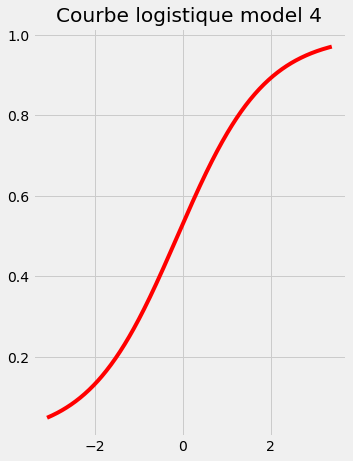

In [0]:
# courbe logistique model 4
plt.figure(figsize=(5,7))
plt.plot(reg_log['X'], reg_log['is genuine'], color='red', label='Courbe logistique')
plt.title('Courbe logistique model 4')
plt.show()

# Cross validation

### Séparation train/test


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [0]:
# défitition variable cible 
y = data["is_genuine"]
# création jeu training et testing avec stratification par y
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3,stratify=y,random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(119, 11) (119,)
(51, 11) (51,)


## Model 1

In [0]:
# définition modele
logisticRegr1 = LogisticRegression()

In [0]:
#définition variables 
cols=["diagonal","height_left","height_right","margin_low","margin_up","length"] 

# ajustement du modele sur données entrainement
logisticRegr1.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# matrice de confusion
actual = y_test
predicted1 = logisticRegr1.predict(X_test[cols])
cm1 = confusion_matrix(actual, predicted1) 
print(cm1)
print(classification_report(actual, predicted1))

[[20  1]
 [ 1 29]]
              precision    recall  f1-score   support

       False       0.95      0.95      0.95        21
        True       0.97      0.97      0.97        30

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



In [0]:
# calcul metrics 
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

precision1 = precision_score(actual, predicted1) 
print('Precision : ', precision1)

AUC_1 = roc_auc_score(actual, predicted1)
print('AUC : ', AUC_1)

Accuracy :  0.9607843137254902
Sensitivity :  0.9523809523809523
Specificity :  0.9666666666666667
Precision :  0.9666666666666667
AUC :  0.9595238095238096


In [0]:
accuracy_score(actual, predicted1) 

0.9607843137254902

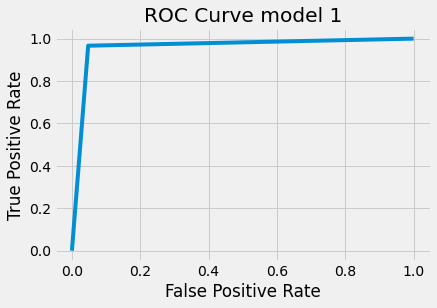

In [0]:
fpr, tpr, thresholds = roc_curve(actual, predicted1)
plt.plot(fpr, tpr)
plt.title("ROC Curve model 1")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 2 

In [0]:
# définition modele
logisticRegr2 = LogisticRegression()

In [0]:
#définition variables 
cols=["margin_low","length"] 

# ajustement du modele sur données entrainement
logisticRegr2.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# matrice de confusion
predicted2 = logisticRegr2.predict(X_test[cols])
cm2 = confusion_matrix(actual, predicted2) 
print(cm2)
print(classification_report(actual, predicted2))

[[21  0]
 [ 0 30]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        21
        True       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [0]:
# calcul metrics 
total2=sum(sum(cm2))
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

precision2 = precision_score(actual, predicted2) 
print('Precision : ', precision2)
AUC_2 = roc_auc_score(actual, predicted2)
print('AUC : ', AUC_2)

Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
Precision :  1.0
AUC :  1.0


In [0]:
accuracy_score(actual, predicted2) 

1.0

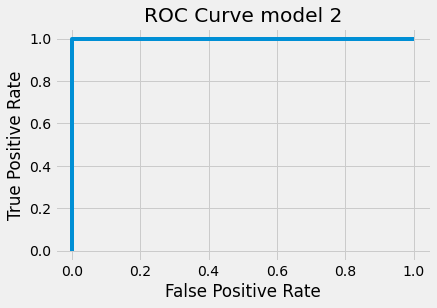

In [0]:
fpr, tpr, thresholds = roc_curve(actual, predicted2)
plt.plot(fpr, tpr)
plt.title("ROC Curve model 2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 3

In [0]:
# définition modele
logisticRegr3 = LogisticRegression()

In [0]:
#définition variables 
cols=["F1","F2"] 

# ajustement du modele sur données entrainement
logisticRegr3.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# matrice de confusion
predicted3 = logisticRegr3.predict(X_test[cols])
cm3 = confusion_matrix(actual, predicted3) 
print(cm3)
print(classification_report(actual, predicted3))

[[20  1]
 [ 2 28]]
              precision    recall  f1-score   support

       False       0.91      0.95      0.93        21
        True       0.97      0.93      0.95        30

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [0]:
# calcul metrics 
total3=sum(sum(cm3))
accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity3 )

specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity3)

precision3 = precision_score(actual, predicted3) 
print('Precision : ', precision3)

AUC_3 = roc_auc_score(actual, predicted3)
print('AUC : ', AUC_3)

Accuracy :  0.9411764705882353
Sensitivity :  0.9523809523809523
Specificity :  0.9333333333333333
Precision :  0.9655172413793104
AUC :  0.9428571428571428


In [0]:
accuracy_score(actual, predicted3) 

0.9411764705882353

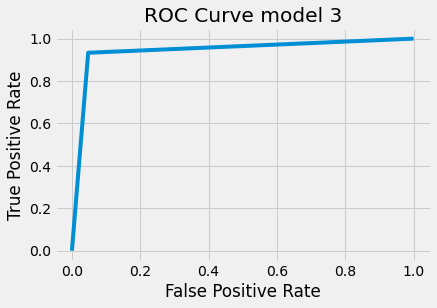

In [0]:
fpr, tpr, thresholds = roc_curve(actual, predicted3)
plt.plot(fpr, tpr)
plt.title("ROC Curve model 3")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 4

In [0]:
# définition modele
logisticRegr4 = LogisticRegression()

In [0]:
#définition variables 
cols=["F1"] 

# ajustement du modele sur données entrainement
logisticRegr4.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# matrice de confusion
predicted4 = logisticRegr4.predict(X_test[cols])
cm4 = confusion_matrix(actual, predicted4) 
print(cm4)
print(classification_report(actual, predicted4))

[[20  1]
 [ 3 27]]
              precision    recall  f1-score   support

       False       0.87      0.95      0.91        21
        True       0.96      0.90      0.93        30

    accuracy                           0.92        51
   macro avg       0.92      0.93      0.92        51
weighted avg       0.93      0.92      0.92        51



In [0]:
# calcul metrics 
total4=sum(sum(cm4))
accuracy4=(cm4[0,0]+cm4[1,1])/total4
print ('Accuracy : ', accuracy4)

sensitivity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity4 )

specificity4 = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity4)

precision4 = precision_score(actual, predicted4) 
print('Precision : ', precision4)

AUC_4 = roc_auc_score(actual, predicted4)
print('AUC : ', AUC_4)

Accuracy :  0.9215686274509803
Sensitivity :  0.9523809523809523
Specificity :  0.9
Precision :  0.9642857142857143
AUC :  0.9261904761904761


In [0]:
accuracy_score(actual, predicted4) 

0.9215686274509803

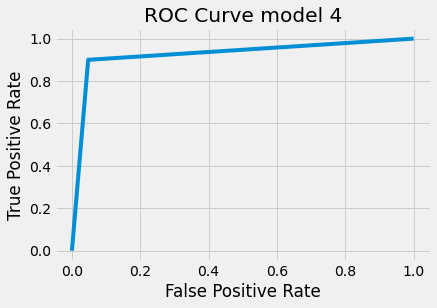

In [0]:
fpr, tpr, thresholds = roc_curve(actual, predicted4)
plt.plot(fpr, tpr)
plt.title("ROC Curve model 4")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Performances modeles


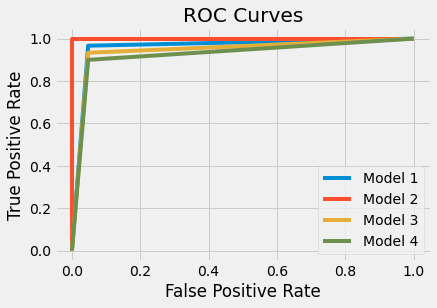

In [0]:
fpr, tpr, thresholds = roc_curve(actual, predicted1)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(actual, predicted2)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(actual, predicted3)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(actual, predicted4)
plt.plot(fpr, tpr)
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(["Model 1", "Model 2", "Model 3","Model 4"])
plt.show()

In [0]:
# préparation compilation metrics différents modèles
accuracy_comp = [accuracy1,accuracy2,accuracy3,accuracy4]

sensitivity_comp = [sensitivity1,sensitivity2,sensitivity3,sensitivity4]

specificity_comp = [specificity1,specificity2,specificity3,specificity4]

precision_comp = [precision1,precision2,precision3,precision4]

auc_comp = [AUC_1,AUC_2,AUC_3,AUC_4]
list_model = ["model1", "model 2", "model 3", "model 4"]

var = ["accuracy", "sensitivity", "specificity","precision", "auc"]
model = [list_model]
values = np.array([accuracy_comp,sensitivity_comp, specificity_comp, precision_comp,auc_comp])
model_comp = pd.DataFrame(data=values, index=var, columns=model)
print(model_comp)

               model1 model 2   model 3   model 4
accuracy     0.960784     1.0  0.941176  0.921569
sensitivity  0.952381     1.0  0.952381  0.952381
specificity  0.966667     1.0  0.933333  0.900000
precision    0.966667     1.0  0.965517  0.964286
auc          0.959524     1.0  0.942857  0.926190


## K fold

In [0]:
from sklearn.model_selection import cross_val_score

### model 1


In [0]:
model = LogisticRegression()
cols=["diagonal","height_left","height_right","margin_low","margin_up","length"] 
X = data[cols]
y = data["is_genuine"]

scores = cross_val_score(model, X, y, cv=5, scoring='precision')
print(np.mean(scores))

1.0


### model 2

In [0]:
cols=["margin_low","length"] 
X = data[cols]

scores = cross_val_score(model, X, y, cv=5, scoring='precision')
print(np.mean(scores))

0.980952380952381


### model 3

In [0]:
cols=["F1","F2"] 
X = data[cols]

scores = cross_val_score(model, X, y, cv=5, scoring='precision')
print(np.mean(scores))

0.980952380952381


### model 4

In [0]:
cols=["F1"] 
X = data[cols]

scores = cross_val_score(model, X, y, cv=5, scoring='precision')
print(np.mean(scores))

0.9604761904761905


## Ajustement Modele performant (modele 2)






In [0]:
cols=["margin_low","length"] 
X = data[cols]
y = data["is_genuine"]
logisticRegr2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# TEST EXAMPLE


In [0]:
# importation données
url_example = "https://raw.githubusercontent.com/xavierbarbier/openclassrooms/master/projet_6/data/example.csv"

example = pd.read_csv(url_example)
print(example)

   diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5


In [0]:
# selection des colonnes à prendre en compte
example_pca = example[["diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"	]]

# préparation des données pour l'ACP
X = example_pca.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

var = example.index
col = ["diagonal",	"height_left",	"height_right",	"margin_low",	"margin_up",	"length"	]

test = pd.DataFrame(data=X_scaled, index=var, columns=col)

test["id"] = example["id"]

example = test

example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014,A_1
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103,A_2
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094,A_3
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107,A_4
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104,A_5


In [0]:
cols=["margin_low","length"] 
example["proba"] = logisticRegr2.predict_proba(example[cols])[:,1]
example["is_genuine"] = logisticRegr2.predict(example[cols])
example["is_genuine"] = example["is_genuine"].astype(bool)
print(example[["id","proba","is_genuine"]])

    id     proba  is_genuine
0  A_1  0.025227       False
1  A_2  0.015513       False
2  A_3  0.084346       False
3  A_4  0.993360        True
4  A_5  0.999580        True
